# Examine the relationship between empowerment and rewards

### Reproduction of the empowerment in 10x10 maze setting
as described in [Klyubin, A., Polani, D., and Nehaniv, C. (2005a). All else being equal be empowered. Advances in Artificial Life, pages 744–753.](https://link.springer.com/content/pdf/10.1007/11553090_75.pdf)

In [1]:
from maze import Maze
from experiment import Experiment
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
# manually hard code walls in the maze
# represented by "prohibited edges" in the connectivity topology.
maze_walls = {((3,0), (3,1)), ((3,1), (4,1)), ((4,1), (4,2)), ((4,2), (5,2)), ((4,2), (4,3)), ((4,3), (5,3)), ((4,3), (4,4)), ((3,3), (3,4)), ((2,3), (2,4)), ((6,5), (6,6)), ((5,6), (6,6)), ((5,7), (6,7)), ((6,6), (7,6)), ((6,7), (7,7))}

# add the walls between row number 7 and 8, which almost form a line except at the 6th column.
for i in range(9):
    if i != 6:
        maze_walls.add(((i,7), (i,8)))

### Empowerment Map

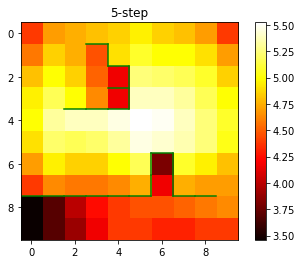

In [3]:
n = 5
maze = Maze(10, 10, maze_walls, reward_chance=0.4)
emp_grid = maze.get_empowerment_grid(n=n)

plt.imshow(emp_grid, cmap='hot')
plt.colorbar()
plt.title(f'{n}-step')
utils.plot_walls(maze_walls, 'g-')
plt.show()

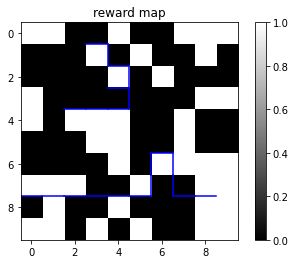

In [4]:
plt.imshow(maze._reward_grid, cmap='gray')
utils.plot_walls(maze_walls, 'b-')
plt.colorbar()
plt.title("reward map")
plt.show()

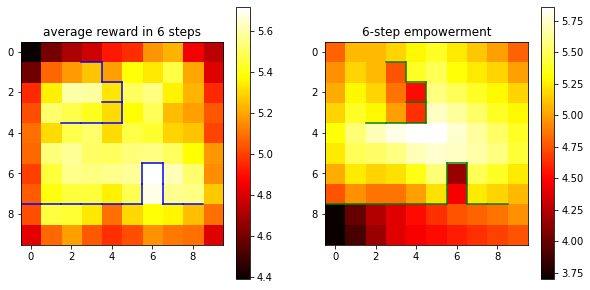

In [5]:
# experiment configurations
num_of_boards = 50  # how many maze boards with different reward maps to create
trials_per_board = 40  # for each position in one maze board, how many agents to create
agent_steps = 6  # how many steps can an agent take to collect rewards
reward_chance = 0.4  # chance of reward appearing at any given position in the maze
x_dim, y_dim = 10, 10  # dimension of the maze board
n = 6  # define n-step empowerment

reward_grid = np.zeros((y_dim, x_dim))
emp_grid = None
for i in range(num_of_boards):
    m = Maze(10, 10, maze_walls, reward_chance=reward_chance)

    if emp_grid is None:
        emp_grid = m.get_empowerment_grid(n)

    e = Experiment(trials_per_board, m, agent_steps)  # perform trials on a given maze
    e.run()
    reward_grid = reward_grid + e.get_reward_grid()

reward_grid = reward_grid / num_of_boards

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(reward_grid, cmap='hot')
utils.plot_walls(maze_walls, 'b-')
plt.colorbar()
plt.title(f"average reward in {agent_steps} steps")

plt.subplot(1, 2, 2)
plt.imshow(emp_grid, cmap='hot')
plt.colorbar()
plt.title(f'{n}-step empowerment')
utils.plot_walls(maze_walls, 'g-')
plt.show()

### reward-empowerment relationship

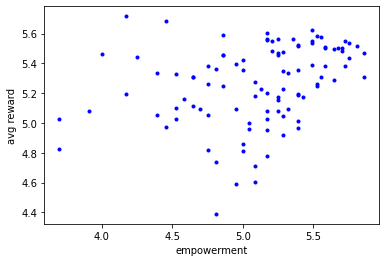

In [6]:
emps = emp_grid.flatten()
rewards = reward_grid.flatten()
assert emps.shape == rewards.shape

sorted_pairs = sorted(zip(emps, rewards), key=lambda pair: pair[0])
sorted_emps = [pair[0] for pair in sorted_pairs]
sorted_rewards = [pair[1] for pair in sorted_pairs]
plt.plot(sorted_emps, sorted_rewards, 'b.')
plt.xlabel("empowerment")
plt.ylabel("avg reward")
plt.show()

## correlation coefficient

In [7]:
n = emps.shape[0]
emps_sum = emps.sum()
rewards_sum = rewards.sum()
emps_squared_sum = np.power(emps, 2).sum()
rewards_squared_sum = np.power(rewards, 2).sum()
emps_rewards_products_sum = (emps * rewards).sum()

correlation_coefficient = (n * emps_rewards_products_sum - emps_sum * rewards_sum) / np.sqrt((n * emps_squared_sum - emps_sum ** 2) * (n * rewards_squared_sum - rewards_sum ** 2))

print('correlation_coefficient: {:.4f}'.format(correlation_coefficient))

correlation_coefficient: 0.3064


# Note!
### Based on observation of running this file multiple times, the correlation coefficient varies from 0.18 to 0.5x due to randomness in the algorithm. But, coefficient values around 0.3x~0.4x are more likely to occur.